In [1]:
import pandas as pd


### Datasets
We have 5 csv file

dim_date.csv

dim_hotels.csv

dim_rooms.csv

fact_aggregated_bookings

fact_bookings.csv

In [5]:
df=pd.read_csv("datasets/fact_bookings.csv")
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [9]:
df.shape

(134590, 12)

In [25]:
df.columns.unique()

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [26]:
df.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [27]:
df.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [29]:
df.room_category.value_counts()

RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: room_category, dtype: int64

<AxesSubplot:>

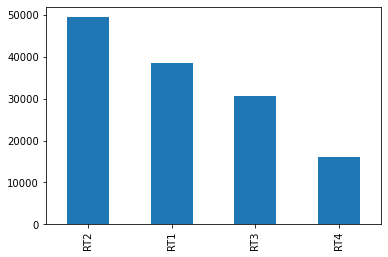

In [39]:
df.room_category.value_counts().plot(kind='bar')

<AxesSubplot:>

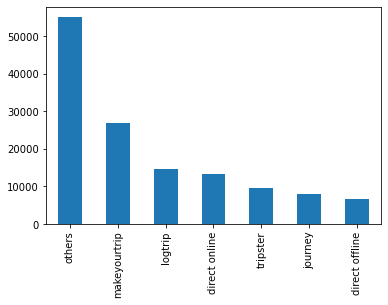

In [44]:
df.booking_platform.value_counts().plot(kind='bar')

read other file from folder

In [230]:
df_bookings=df
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [46]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [47]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

<AxesSubplot:>

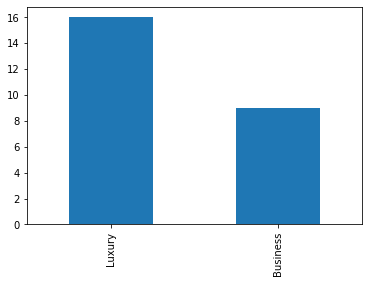

In [53]:
df_hotels.category.value_counts().plot(kind='bar')

In [52]:
df_hotels.city.value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

<AxesSubplot:>

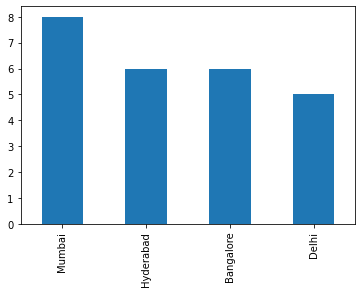

In [51]:
df_hotels.city.value_counts().plot(kind='bar')

explore agrregate bookings table

In [54]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [55]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [74]:
df_agg_bookings.groupby('room_category').sum()


,property_id,successful_bookings,capacity
room_category,,,
RT1,41493472,38651,66378.0
RT2,41493472,49534,85928.0
RT3,41493472,30566,53084.0
RT4,41493472,16082,27140.0


In [72]:
df_agg_bookings.groupby('room_category').successful_bookings.sum()

room_category
RT1    38651
RT2    49534
RT3    30566
RT4    16082
Name: successful_bookings, dtype: int64

In [75]:
df_agg_bookings.groupby('room_category')['successful_bookings'].sum()

room_category
RT1    38651
RT2    49534
RT3    30566
RT4    16082
Name: successful_bookings, dtype: int64

In [79]:
#Find out days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [82]:
#Find out days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings['successful_bookings']>df_agg_bookings['capacity']]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [109]:
#Find out properties that have highest capacity

df_agg_bookings.capacity.max()
                        

50

In [116]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]



,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,50.0
1,19562,1-May-22,RT1,28,50.0
2,19563,1-May-22,RT1,23,50.0
3,17558,1-May-22,RT1,30,50.0
4,16558,1-May-22,RT1,18,50.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,50.0
9196,16559,31-Jul-22,RT4,13,50.0
9197,17558,31-Jul-22,RT4,3,50.0
9198,19563,31-Jul-22,RT4,3,50.0



### -- 2. Data Cleaning


In [113]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [119]:
df_bookings[df_bookings.no_guests<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [122]:
#ignore wronge negative gets
df_bookings=df_bookings[df_bookings.no_guests>0]

Outlier removal in revenue generated

In [134]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [135]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(15378.036937686695, 13500.0)

(15378.036937686695, 13500.0)

In [138]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()


15378.036937686695

In [139]:
avg

15378.036937686695

In [140]:
std

93040.15493143328

In [182]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [183]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

In [184]:
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [185]:
df_bookings=df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT4,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT4,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT4,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT4,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT4,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [186]:
df_bookings.shape

(133274, 12)

Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)

In [212]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77349
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64


Total values in our dataframe is 133274. Out of that 77349 rows has null rating. Since there are many rows with null rating, we should not filter these values. 
Also we should not replace this rating with a median or mean rating etc

In [214]:
df_agg_bookings.isnull().sum()

# No null valus found

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records

In [217]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
12,16563,1-May-22,RT1,100,50.0
6209,19560,2-Jul-22,RT1,123,50.0


In [227]:
df_agg_bookings.shape

(9198,)

In [221]:
df_agg_bookings=df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9198, 5)

***
### ==> 3. Data Transformationtute (possible ways is to use mean or median)

In [228]:
df_agg_bookings.head(3)

0    0.50
1    0.56
2    0.46
dtype: float64

In [231]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [234]:
# occuepancy % 
df_agg_bookings['occ_pct'] = df_agg_bookings['successful_bookings']/df_agg_bookings.capacity
df_agg_bookings.head(3)


,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


In [235]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [236]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
 5   occ_pct              9198 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 431.4+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

In [238]:
#**1. What is an average occupancy rate in each of the room categories?**

df_agg_bookings.groupby('room_category').occ_pct.mean()

room_category
RT1    0.582242
RT2    0.580402
RT3    0.580283
RT4    0.593002
Name: occ_pct, dtype: float64

### I don't understand RT1, RT2 etc. Print 
room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [ ]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

In [282]:
df=pd.merge(df_agg_bookings,df_rooms,left_on='room_category',right_on="room_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,0.833333,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,0.933333,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,0.766667,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,1.578947,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,0.947368,RT1,Standard


In [256]:
df.drop('room_id',axis=1,inplace=True)


In [257]:

df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,0.833333,Standard
1,19562,1-May-22,RT1,28,30.0,0.933333,Standard
2,19563,1-May-22,RT1,23,30.0,0.766667,Standard
3,17558,1-May-22,RT1,30,19.0,1.578947,Standard


In [258]:
df.groupby('room_class').occ_pct.mean()

room_class
Elite           0.580402
Premium         0.580283
Presidential    0.593002
Standard        0.582242
Name: occ_pct, dtype: float64

In [ ]:
df[df.room_class=="Standard"].occ_pct.mean()

In [270]:
df[df['room_class']=="Standard"]


,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,0.833333,Standard
1,19562,1-May-22,RT1,28,30.0,0.933333,Standard
2,19563,1-May-22,RT1,23,30.0,0.766667,Standard
3,17558,1-May-22,RT1,30,19.0,1.578947,Standard
4,16558,1-May-22,RT1,18,19.0,0.947368,Standard
...,...,...,...,...,...,...,...
2295,18562,31-Jul-22,RT1,28,38.0,0.736842,Standard
2296,18563,31-Jul-22,RT1,15,27.0,0.555556,Standard
2297,19559,31-Jul-22,RT1,15,24.0,0.625000,Standard
2298,19561,31-Jul-22,RT1,21,36.0,0.583333,Standard


In [274]:
df[df.room_class=="Standard"].occ_pct.mean()

0.5822421563514021

In [276]:
#Print average occupancy rate per city

df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [283]:
df=pd.merge(df,df_hotels, on="property_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,0.833333,RT1,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,0.666667,RT1,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,0.566667,RT1,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,0.700000,RT1,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,0.533333,RT1,Standard,Atliq Exotica,Luxury,Mumbai


In [284]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    0.565941
Delhi        0.616063
Hyderabad    0.581445
Mumbai       0.579364
Name: occ_pct, dtype: float64

When was the occupancy better? Weekday or Weekend?

In [285]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [286]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,0.600000,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,0.609756,RT2,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,0.625000,RT3,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [287]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    0.51
weekend     0.72
Name: occ_pct, dtype: float64

**4: In the month of June, what is the occupancy for different cities**

In [297]:
df_june22=df[df['mmm yy']=="Jun 22"]
df_june22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,0.666667,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,0.634146,RT2,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,0.625000,RT3,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,0.611111,RT4,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,0.633333,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [303]:
df_june22.groupby('city').occ_pct.mean().round(2).sort_values(ascending=False)

city
Delhi        0.62
Hyderabad    0.58
Mumbai       0.58
Bangalore    0.57
Name: occ_pct, dtype: float64

<AxesSubplot:xlabel='city'>

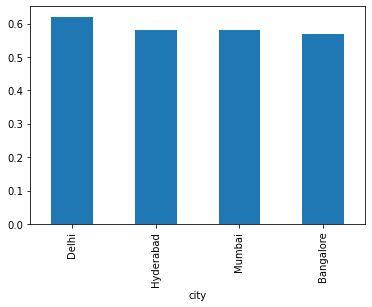

In [305]:
df_june22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

 We got new data for the month of august. Append that to existing data

In [311]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [312]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [327]:
df = df.rename(columns={'occ_pct': 'occ%'})

In [328]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ%', 'room_id', 'room_class', 'property_name',
       'category', 'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [329]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ%,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
6497,18560,31-Jul-22,RT2,34,40.0,0.850000,RT2,Elite,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6498,18560,31-Jul-22,RT3,17,24.0,0.708333,RT3,Premium,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6499,18560,31-Jul-22,RT4,12,15.0,0.800000,RT4,Presidential,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6500,16559,01-Aug-22,RT1,30,30.0,100.000000,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday
6501,19562,01-Aug-22,RT1,21,30.0,70.000000,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday
6502,19563,01-Aug-22,RT1,23,30.0,76.670000,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday
6503,19558,01-Aug-22,RT1,30,40.0,75.000000,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday
6504,19560,01-Aug-22,RT1,20,26.0,76.920000,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday
6505,17561,01-Aug-22,RT1,18,26.0,69.230000,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday
6506,17564,01-Aug-22,RT1,10,16.0,62.500000,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday


In [330]:
latest_df.head(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ%,room_id,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,0.600000,RT1,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,0.609756,RT2,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,0.625000,RT3,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,0.722222,RT4,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,0.600000,RT1,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
5,19562,10-May-22,RT2,15,23.0,0.652174,RT2,Elite,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
6,19562,10-May-22,RT3,19,29.0,0.655172,RT3,Premium,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
7,19562,10-May-22,RT4,9,14.0,0.642857,RT4,Presidential,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
8,19563,10-May-22,RT1,16,30.0,0.533333,RT1,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
9,19563,10-May-22,RT2,25,45.0,0.555556,RT2,Elite,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday


 Print revenue realized per city

In [331]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [332]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [335]:
df_bookings_all =pd.merge(df_bookings,df_hotels,on='property_id')
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [338]:
df_bookings_all.groupby('city').revenue_realized.sum()

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

In [ ]:
 Print month by month revenue

In [339]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [340]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [341]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [342]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
 12  property_name      134590 non-null  object 
 13  category           134590 non-null  object 
 14  city               134590 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [343]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,2022-01-05,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,2022-01-05,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,28-04-22,2022-01-05,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [344]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  object        
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  object        
 5   no_guests          134587 non-null  float64       
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      56683 non-null   float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
 12  property_name      134590 non-null  object        
 13  category           134590 non-null  object  

In [346]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [349]:
df_date['date']=pd.to_datetime(df_date['date'])

In [350]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [354]:
df_bookings_all=pd.merge(df_bookings_all,df_date,left_on='check_in_date',right_on='date')
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [355]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    390005772
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

### Print revenue realized per hotel type

In [358]:
df_bookings_all.groupby('property_name').revenue_realized.sum().round(2).sort_values()

property_name
Atliq Seasons     45959517
Atliq Grands     145860641
Atliq Blu        179203544
Atliq Bay        179429321
Atliq City       196568883
Atliq Palace     209474575
Atliq Exotica    219076161
Name: revenue_realized, dtype: int64

### Print average rating per city

In [361]:
df_bookings_all.groupby('city').ratings_given.mean().round(2).sort_values()

city
Bangalore    3.40
Mumbai       3.64
Hyderabad    3.66
Delhi        3.77
Name: ratings_given, dtype: float64

### Exercise-3 Print a pie chart of revenue realized per booking platform**

<AxesSubplot:ylabel='revenue_realized'>

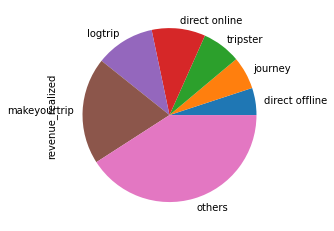

In [363]:
df_bookings_all.groupby('booking_platform').revenue_realized.sum().round(2).sort_values().plot(kind='pie')

In [ ]:
df_bookings_all.groupby('booking_platform').revenue_realized.sum().round(2).sort_values().plot()